# Advance Data Analytics assignment 

# Submitted by- Anushka Srivastava

# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the data

In [2]:
df=pd.read_csv(r'C:\Users\ananyya srivastava\Desktop\soil-Data-kollamcsv1.csv')

In [3]:
df.head()

,District,Block,Panchayath,SampleCode,FarmerName,f_sex,f_surveyno,f_latitude,f_longitude,f_panchayat,...,Soil_P,Soil_k,Soil_Ca,Soil_Mg,Soil_s,Soil_Zn,Soil_b,Soil_Fe,Soil_Cu,Soil_Mn
0,Kollam,Anchal Block,Alayamon,KLM/PTP/AYM/741/1/320/235225,Praksh Kumar.P,male,741/1/320,8.87641,76.9707,84.0,...,7.413,237.6,305.15,10.610,0.000,1.575,0.05310,14.860,2.3090,14.80
1,Kollam,Anchal Block,Alayamon,KLM/PTP/AYM/745/12541/235226,Vasanthakumari,female,745/12541,8.87658,76.97127,84.0,...,16.980,215.6,667.00,11.300,0.000,1.859,0.02656,11.060,1.0710,47.54
2,Kollam,Anchal Block,Alayamon,KLM/PTP/AYM/745/1/2541/235227,Radhakrishnapillai,male,745/1/2541,8.87689,76.97153,84.0,...,2.631,102.3,606.00,11.675,0.000,0.790,0.04194,9.132,1.1210,39.62
3,Kollam,Anchal Block,Alayamon,KLM/PTP/AYM/745/1/235228,Chandrabose,male,745/1,8.87694,76.97161,84.0,...,14.340,298.1,1045.00,12.710,1.973,1.408,0.18174,10.180,1.2570,59.96
4,Kollam,Anchal Block,Alayamon,KLM/PTP/AYM/745/1/2539/235229,Usha Chandran,female,745/1/2539,8.87639,76.97159,84.0,...,46.869,205.7,2441.50,11.790,0.603,1.870,0.09506,14.350,0.8107,76.34


In [4]:
df.count()

District         4048
Block            4048
Panchayath       4048
SampleCode       4048
FarmerName       4048
f_sex            4048
f_surveyno       4048
f_latitude       3861
f_longitude      3861
f_panchayat      4048
f_district       4048
f_taluk          4048
f_block          4048
f_mob_no          330
SoilType         4048
crop1            4048
crop2            4048
crop3            4048
Soil_pH          4048
Soil_ec          4050
Unnamed: 20      4050
Soil_OrganicC    4050
Unnamed: 22      4050
Soil_P           4048
Soil_k           4048
Soil_Ca          4048
Soil_Mg          4048
Soil_s           4048
Soil_Zn          4048
Soil_b           4048
Soil_Fe          4048
Soil_Cu          4048
Soil_Mn          4048
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 33 columns):
District         4048 non-null object
Block            4048 non-null object
Panchayath       4048 non-null object
SampleCode       4048 non-null object
FarmerName       4048 non-null object
f_sex            4048 non-null object
f_surveyno       4048 non-null object
f_latitude       3861 non-null object
f_longitude      3861 non-null object
f_panchayat      4048 non-null float64
f_district       4048 non-null float64
f_taluk          4048 non-null float64
f_block          4048 non-null float64
f_mob_no         330 non-null float64
SoilType         4048 non-null object
crop1            4048 non-null object
crop2            4048 non-null object
crop3            4048 non-null object
Soil_pH          4048 non-null float64
Soil_ec          4050 non-null float64
Unnamed: 20      4050 non-null object
Soil_OrganicC    4050 non-null float64
Unnamed: 22      4050 non-null object
Soil_P      

In [6]:
print(df.columns.values)

['District' 'Block' 'Panchayath' 'SampleCode' 'FarmerName' 'f_sex'
 'f_surveyno' 'f_latitude' 'f_longitude' 'f_panchayat' 'f_district'
 'f_taluk' 'f_block' 'f_mob_no' 'SoilType' 'crop1' 'crop2' 'crop3'
 'Soil_pH' 'Soil_ec' 'Unnamed: 20' 'Soil_OrganicC' 'Unnamed: 22' 'Soil_P'
 'Soil_k' 'Soil_Ca' 'Soil_Mg' 'Soil_s' 'Soil_Zn' 'Soil_b' 'Soil_Fe'
 'Soil_Cu' 'Soil_Mn']


In [7]:
df.describe()

,f_panchayat,f_district,f_taluk,f_block,f_mob_no,Soil_pH,Soil_ec,Soil_OrganicC,Soil_P,Soil_k,Soil_Ca,Soil_Mg,Soil_s,Soil_Zn,Soil_b,Soil_Fe,Soil_Cu,Soil_Mn
count,4048.000000,4048.0,4048.000000,4048.000000,3.300000e+02,4048.000000,4050.000000,4050.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.00000,4048.000000
mean,122.177125,2.0,6.690217,24.579792,9.384199e+09,5.846287,0.358561,1.797981,67.424614,192.167437,417.904146,24.666415,3.363671,3.217135,0.528337,49.656148,1.23289,22.079388
std,22.751969,0.0,0.737893,4.364429,9.849650e+08,0.725837,11.415572,57.194304,51.812779,231.068588,527.234144,54.907931,4.760118,5.389476,0.516771,85.566393,6.73168,28.507297
min,84.000000,2.0,5.000000,18.000000,9.495645e+08,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,98.000000,2.0,6.000000,20.000000,9.446369e+09,5.360000,0.050000,0.546000,34.193750,95.000000,98.230000,11.228750,1.260000,0.830000,0.100600,11.800000,0.42000,7.597750
50%,116.000000,2.0,7.000000,23.000000,9.605574e+09,5.860000,0.100000,0.810000,55.000000,162.000000,181.650000,16.652500,2.083000,1.560000,0.532700,20.500000,0.75000,15.310000
75%,149.000000,2.0,7.000000,30.000000,9.846952e+09,6.300000,0.170000,1.090000,85.000000,224.550000,555.375000,29.005000,3.302500,3.572500,0.820000,47.320000,1.25000,27.110000
max,157.000000,2.0,9.000000,33.000000,9.995877e+09,9.900000,725.997200,3640.461050,471.000000,5863.000000,3787.500000,3041.000000,92.200000,111.800000,5.200000,911.300000,413.50000,694.900000


In [8]:
df=df.dropna()

In [9]:
df.Block.value_counts()

Ithikkara Block         176
Chittumala Block         91
Oachira Block            11
Chavara Block            10
Vettikkavala Block        4
Paravoor MC               3
Karunagappally Block      3
Anchal Block              1
Name: Block, dtype: int64

In [10]:
df[['f_panchayat','f_district','f_taluk','f_block','f_mob_no']].head()

,f_panchayat,f_district,f_taluk,f_block,f_mob_no
20,84.0,2.0,9.0,18.0,9.048727e+09
1221,104.0,2.0,5.0,21.0,9.048787e+09
1222,104.0,2.0,5.0,21.0,9.605796e+09
1223,104.0,2.0,5.0,21.0,9.847162e+09
1224,104.0,2.0,5.0,21.0,9.947784e+09


# Soil columns seggregation

In [11]:

soil_col=['Soil_pH','Soil_ec','Soil_OrganicC','Soil_P','Soil_k','Soil_Ca','Soil_Mg','Soil_s',
          'Soil_Zn','Soil_b','Soil_Fe','Soil_Cu','Soil_Mn']

# Methods columns seggregation

In [12]:
methods_col=['Zinc_Method','Copper_Method','Iron_Method','Manganese_Method']

# Farmer columns seggregation

In [13]:
f_col=['FarmerName','ContactAddress','f_dateofsampling','f_sex', 'f_surveyno','f_latitude', 'f_longitude', 'f_ownership', 'f_ownername',
       'f_panchayat', 'f_pincode', 'f_district', 'f_taluk', 'f_block','f_mob_no',]

# Mean of soil column

In [14]:
df[soil_col].mean()

Soil_pH            6.039298
Soil_ec            0.149934
Soil_OrganicC      1.105262
Soil_P            79.597132
Soil_k           250.880936
Soil_Ca          930.906952
Soil_Mg           27.636103
Soil_s             3.850712
Soil_Zn            4.638260
Soil_b             0.168958
Soil_Fe          109.325547
Soil_Cu            1.422749
Soil_Mn           30.031668
dtype: float64

# Boxplot of pH in diff blocks

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

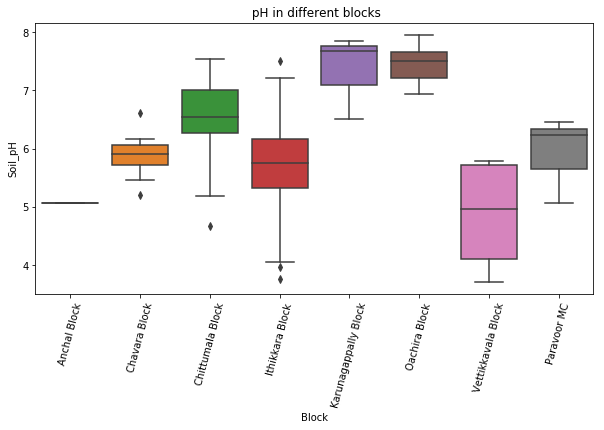

In [15]:

plt.figure(figsize=(10,5))
sns.boxplot(x='Block',y='Soil_pH',data=df)
plt.title(" pH in different blocks")
plt.xticks(rotation=75)

# Boxplot of potassium in different blocks

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

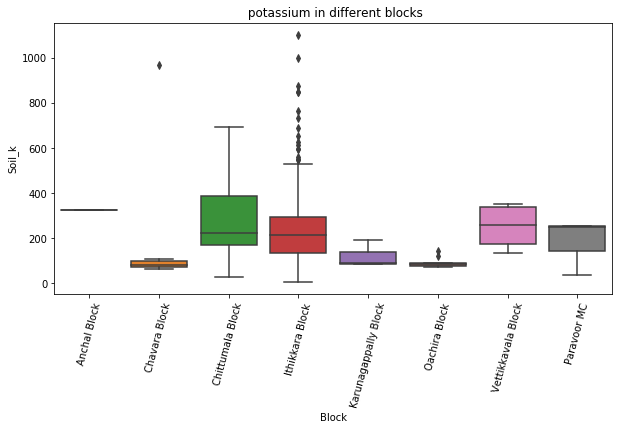

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Block',y='Soil_k',data=df)
plt.title(" potassium in different blocks")
plt.xticks(rotation=75)

# Boxplot of calcium in different blocks

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

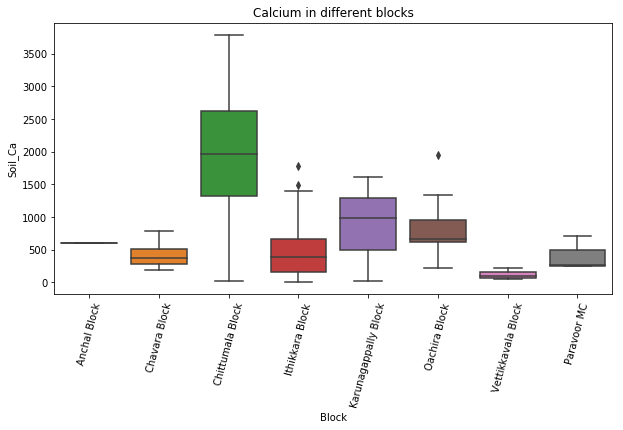

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Block',y='Soil_Ca',data=df)
plt.title("Calcium in different blocks")
plt.xticks(rotation=75)

# Boxplot of manganese in different Blocks

Text(0.5, 1.0, 'Mangnese distribution')

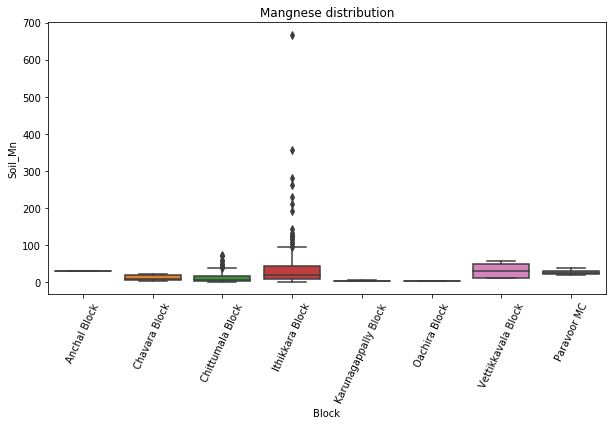

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Block',y='Soil_Mn',data=df)
plt.xticks(rotation=65)
plt.title('Mangnese distribution')

# Heatmap of Blocks and soil distribution

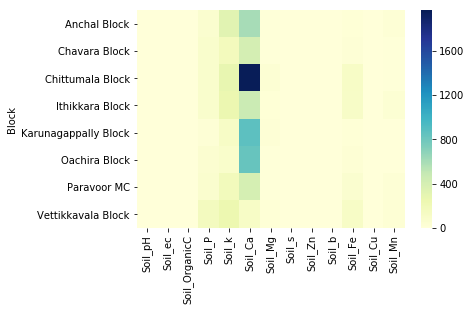

In [19]:
mean=df.groupby('Block')[soil_col].mean()
sns.heatmap(mean,cmap="YlGnBu")

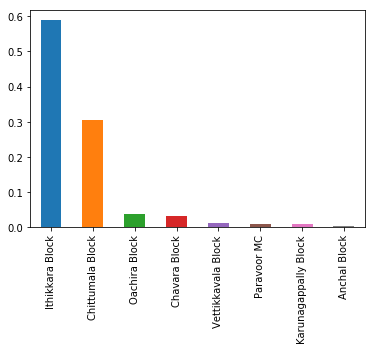

In [20]:
df['Block'].value_counts(normalize=True).plot(kind='Bar')

In [21]:

from scipy import stats

In [30]:
block_ph=df[['Block','Soil_pH']]

In [31]:
block_ph.head()

,Block,Soil_pH
20,Anchal Block,5.07
1221,Chavara Block,6.03
1222,Chavara Block,6.61
1223,Chavara Block,6.16
1224,Chavara Block,6.07


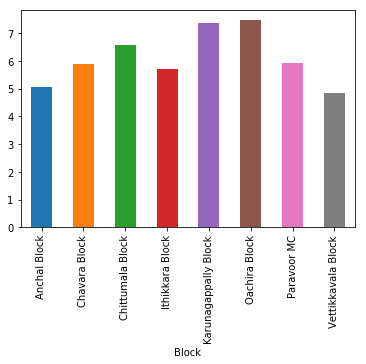

In [33]:
block_ph.groupby('Block')['Soil_pH'].mean().plot(kind='bar')

In [35]:
block_ph=block_ph.groupby('Block')

In [36]:

block_ph.groups['Anchal Block']

Int64Index([20], dtype='int64')

In [37]:
block_ph.groups['Paravoor MC']

Int64Index([3886, 3929, 3940], dtype='int64')

# One way annova 
Ho: The distribution of soil is same in all blocks
Ha: is different in all blocks

In [38]:
stats.f_oneway(block_ph.groups['Anchal Block'],
               block_ph.groups['Chavara Block'],
               block_ph.groups['Chittumala Block'],
               block_ph.groups['Ithikkara Block'],
               block_ph.groups['Karunagappally Block'],
               block_ph.groups['Oachira Block'],
               block_ph.groups['Paravoor MC'],
               block_ph.groups['Vettikkavala Block'])

F_onewayResult(statistic=619.6502149478434, pvalue=1.0062709944331959e-170)

# As p value is less than 0.5 thus we reject null hypothesis

In [40]:

group_ca=df[['Block','Soil_Ca']]
block_ca=group_ca.groupby('Block')

In [41]:
stats.f_oneway(block_ca.groups['Anchal Block'],
               block_ca.groups['Chavara Block'],
               block_ca.groups['Chittumala Block'],
               block_ca.groups['Ithikkara Block'],
               block_ca.groups['Karunagappally Block'],
               block_ca.groups['Oachira Block'],
               block_ca.groups['Paravoor MC'],
               block_ca.groups['Vettikkavala Block'])

F_onewayResult(statistic=619.6502149478434, pvalue=1.0062709944331959e-170)

# As p value is less than 0.5 thus we reject null hypothesis

In [42]:
group_k=df[['Block','Soil_k']]
block_k=group_k.groupby('Block')

In [43]:
stats.f_oneway(block_k.groups['Anchal Block'],
               block_k.groups['Chavara Block'],
               block_k.groups['Chittumala Block'],
               block_k.groups['Ithikkara Block'],
               block_k.groups['Karunagappally Block'],
               block_k.groups['Oachira Block'],
               block_k.groups['Paravoor MC'],
               block_k.groups['Vettikkavala Block'])

F_onewayResult(statistic=619.6502149478434, pvalue=1.0062709944331959e-170)

# As p value is less than 0.5 thus we reject null hypothesis

# ph Distribution in different panchayats

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

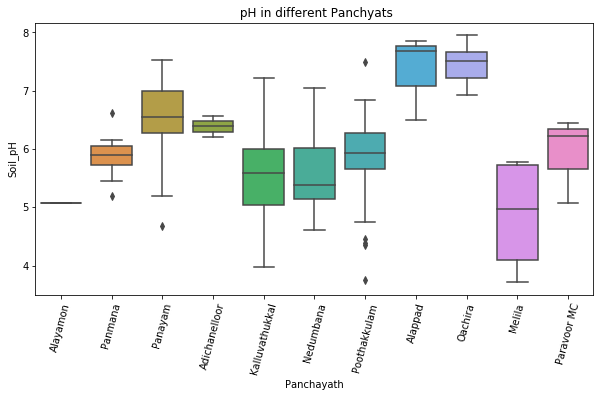

In [44]:

plt.figure(figsize=(10,5))
sns.boxplot(x='Panchayath',y='Soil_pH',data=df)
plt.title(" pH in different Panchyats")
plt.xticks(rotation=75)

# Potassiaum distribution in different panchayaths

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

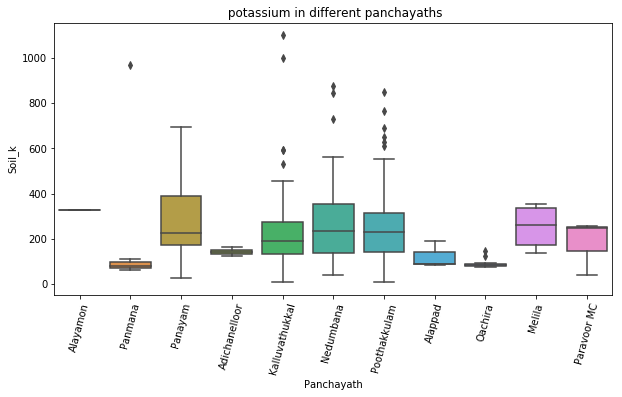

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Panchayath',y='Soil_k',data=df)
plt.title(" potassium in different panchayaths")
plt.xticks(rotation=75)

# Calcium distribution in different panchayaths

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

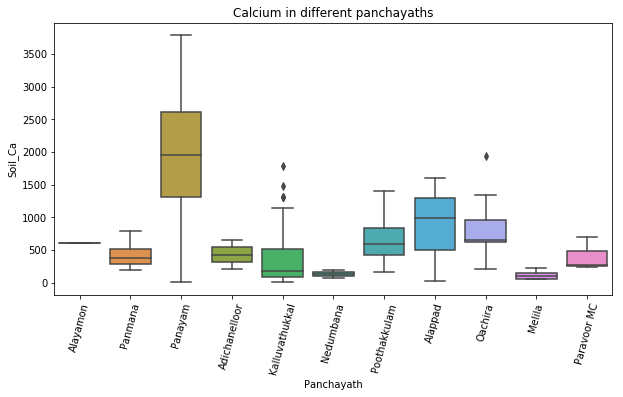

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Panchayath',y='Soil_Ca',data=df)
plt.title("Calcium in different panchayaths")
plt.xticks(rotation=75)

# Manganese distribution in different panchayaths

Text(0.5, 1.0, 'Mangnese distribution')

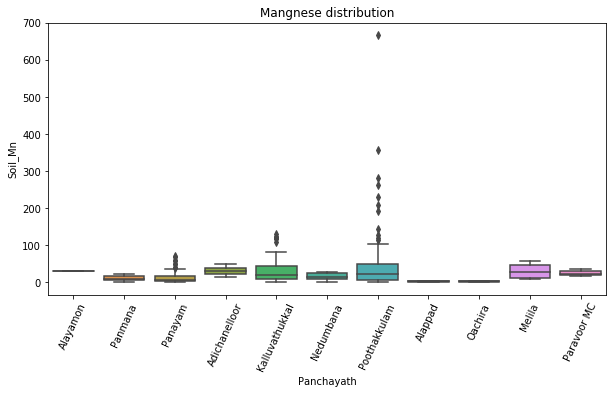

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Panchayath',y='Soil_Mn',data=df)
plt.xticks(rotation=65)
plt.title('Mangnese distribution')

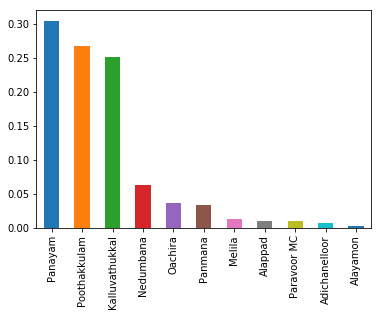

In [48]:
df['Panchayath'].value_counts(normalize=True).plot(kind='Bar')

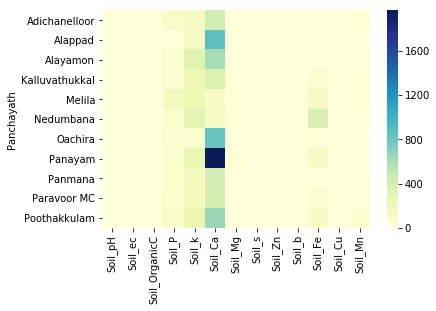

In [49]:
mean=df.groupby('Panchayath')[soil_col].mean()
sns.heatmap(mean,cmap="YlGnBu")

In [50]:
pan_ph=df[['Panchayath','Soil_pH']]

In [51]:
pan_ph.head()

,Panchayath,Soil_pH
20,Alayamon,5.07
1221,Panmana,6.03
1222,Panmana,6.61
1223,Panmana,6.16
1224,Panmana,6.07


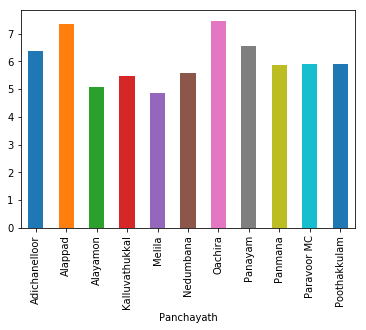

In [52]:
pan_ph.groupby('Panchayath')['Soil_pH'].mean().plot(kind='bar')

In [55]:
df.Panchayath.value_counts()

Panayam           91
Poothakkulam      80
Kalluvathukkal    75
Nedumbana         19
Oachira           11
Panmana           10
Melila             4
Alappad            3
Paravoor MC        3
Adichanelloor      2
Alayamon           1
Name: Panchayath, dtype: int64

In [53]:
group1_ph=pan_ph.groupby('Panchayath')

In [54]:
group1_ph

In [60]:
stats.f_oneway(group1_ph.groups['Panayam'],
               group1_ph.groups['Poothakkulam'],
               group1_ph.groups['Kalluvathukkal'],
               group1_ph.groups['Nedumbana'],
               group1_ph.groups['Oachira'],
               group1_ph.groups['Melila'],
               group1_ph.groups['Alappad'],group1_ph.groups['Paravoor MC'],group1_ph.groups['Adichanelloor'],group1_ph.groups['Alayamon'])

F_onewayResult(statistic=4117.054406581179, pvalue=6.441490948739199e-291)

# As p value is less than 0.5 we reject null hypothesis

In [61]:

pan_ca=df[['Panchayath','Soil_Ca']]
group1_ca=pan_ca.groupby('Panchayath')

In [62]:
stats.f_oneway(group1_ca.groups['Panayam'],
               group1_ca.groups['Poothakkulam'],
               group1_ca.groups['Kalluvathukkal'],
               group1_ca.groups['Nedumbana'],
               group1_ca.groups['Oachira'],
               group1_ca.groups['Melila'],
               group1_ca.groups['Alappad'],group1_ca.groups['Paravoor MC'],group1_ca.groups['Adichanelloor'],group1_ca.groups['Alayamon'])

F_onewayResult(statistic=4117.054406581179, pvalue=6.441490948739199e-291)

# As p value is less than 0.5 thus we reject null hypothesis

In [63]:
pan_k=df[['Panchayath','Soil_k']]
group1_k=pan_k.groupby('Panchayath')

In [64]:
stats.f_oneway(group1_k.groups['Panayam'],
               group1_k.groups['Poothakkulam'],
               group1_k.groups['Kalluvathukkal'],
               group1_k.groups['Nedumbana'],
               group1_k.groups['Oachira'],
               group1_k.groups['Melila'],
               group1_k.groups['Alappad'],group1_k.groups['Paravoor MC'],group1_k.groups['Adichanelloor'],group1_k.groups['Alayamon'])

F_onewayResult(statistic=4117.054406581179, pvalue=6.441490948739199e-291)

# As p value is less than 0.5 thus we reject null hypothesis

# We conclude that soil distribution in different blocks and panchayaths is different as p value is coming less than 0.5

In [65]:
df.Block.value_counts()

Ithikkara Block         176
Chittumala Block         91
Oachira Block            11
Chavara Block            10
Vettikkavala Block        4
Paravoor MC               3
Karunagappally Block      3
Anchal Block              1
Name: Block, dtype: int64

In [66]:
df.shape

(299, 33)

In [67]:
df.District.value_counts()

Kollam    299
Name: District, dtype: int64

In [68]:
df.Panchayath.value_counts()

Panayam           91
Poothakkulam      80
Kalluvathukkal    75
Nedumbana         19
Oachira           11
Panmana           10
Melila             4
Alappad            3
Paravoor MC        3
Adichanelloor      2
Alayamon           1
Name: Panchayath, dtype: int64